# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

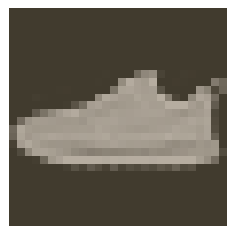

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [11]:
# TODO: Define your network architecture here
from collections import OrderedDict

il_size = 784
hl_size = [256, 64]
ol_size = 10


nn_dict = OrderedDict([('hl1', nn.Linear(il_size, hl_size[0])),
                       ('ReLU1', nn.ReLU()),
                       ('hl2', nn.Linear(hl_size[0], hl_size[1])),
                       ('ReLU2', nn.ReLU()),
                       ('ol', nn.Linear(hl_size[1], ol_size)),
                       ])

nn_model = nn.Sequential(nn_dict)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [21]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(nn_model.parameters(), lr= 0.01)

In [52]:
# TODO: Train the network here
epochs = 3
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        steps += 1
        #images, labels = next(iter(trainloader))
        images.resize_(images.shape[0], 784)
        optimizer.zero_grad()

        output = nn_model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % 40 == 0:
            print('Epoch: {}/{}...'.format(e+1, epochs),
                  '{:.4f}'.format(running_loss/40))
            running_loss = 0


Epoch: 1/6... 0.3914
Epoch: 1/6... 0.3894
Epoch: 1/6... 0.4085
Epoch: 1/6... 0.4119
Epoch: 1/6... 0.3952
Epoch: 1/6... 0.4066
Epoch: 1/6... 0.3515
Epoch: 1/6... 0.3645
Epoch: 1/6... 0.3765
Epoch: 1/6... 0.3618
Epoch: 1/6... 0.3692
Epoch: 1/6... 0.3963
Epoch: 1/6... 0.3947
Epoch: 1/6... 0.4108
Epoch: 1/6... 0.3754
Epoch: 1/6... 0.3991
Epoch: 1/6... 0.3788
Epoch: 1/6... 0.4119
Epoch: 1/6... 0.3785
Epoch: 1/6... 0.3564
Epoch: 1/6... 0.3965
Epoch: 1/6... 0.3865
Epoch: 1/6... 0.3759
Epoch: 2/6... 0.2294
Epoch: 2/6... 0.3865
Epoch: 2/6... 0.3540
Epoch: 2/6... 0.3906
Epoch: 2/6... 0.3709
Epoch: 2/6... 0.3568
Epoch: 2/6... 0.3982
Epoch: 2/6... 0.3905
Epoch: 2/6... 0.3913
Epoch: 2/6... 0.3697
Epoch: 2/6... 0.3637
Epoch: 2/6... 0.3847
Epoch: 2/6... 0.3979
Epoch: 2/6... 0.3818
Epoch: 2/6... 0.3852
Epoch: 2/6... 0.3555
Epoch: 2/6... 0.3898
Epoch: 2/6... 0.3694
Epoch: 2/6... 0.3563
Epoch: 2/6... 0.3712
Epoch: 2/6... 0.3435
Epoch: 2/6... 0.3808
Epoch: 2/6... 0.3785
Epoch: 3/6... 0.0377
Epoch: 3/6...

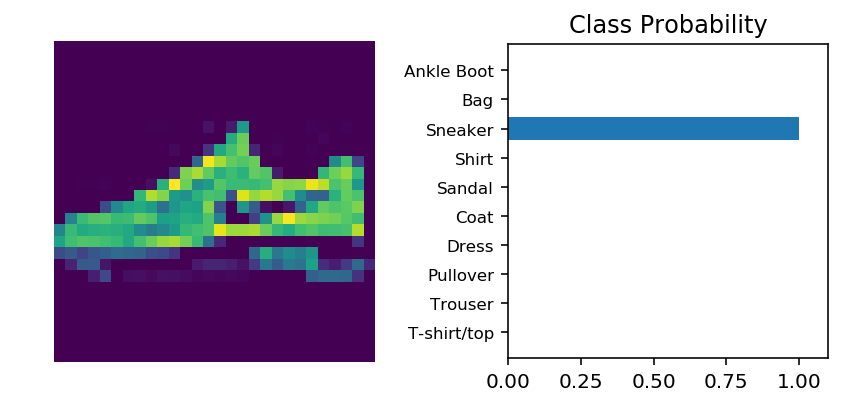

In [79]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(nn_model.forward(img), dim= 1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.